# Wandb export - results visualization for methods on batch = 8

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.settings import WANDB_EXPORT_DIR, FIGURE_DIR

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
PROJECT_NAME = 'neurosymbolics_batch_8'

filename = f'wandb_results_{PROJECT_NAME}.csv'
filepath = WANDB_EXPORT_DIR.joinpath(filename)
df_results = pd.read_csv(filepath).query('state == "finished"')

df_results

,Unnamed: 0,seed,repeat,data_lang,data_name,model/name,data_source,model/class,trainer/gpus,trainer/class,...,test/cm/60,test/cm/71,test/cm/57,test/cm/59,test/cm/66,test/cm/75,test/cm/48,test/cm/78,test/cm/70,test/cm/76
0,0,2050.0,0.0,en,goemotions_sent,roberta-base,original,src.models.baseline.BaselineModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2050.0,0.0,en,goemotions_sent,roberta-base,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2054.0,4.0,en,goemotions_sent,roberta-base,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2054.0,4.0,en,goemotions_sent,roberta-base,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2054.0,4.0,en,goemotions_sent,roberta-base,original,src.models.baseline.BaselineModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,908,2050.0,0.0,en,movie_reviews,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,909,2051.0,1.0,en,movie_reviews,bert-base-cased,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,910,2050.0,0.0,en,imdb,bert-base-cased,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,911,2050.0,0.0,en,stanford_treebank,bert-base-cased,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 912
Columns: 229 entries, Unnamed: 0 to test/cm/76
dtypes: float64(122), int64(1), object(106)
memory usage: 1.6+ MB


In [4]:
MODEL_CLASS_MAPPER = {
    'src.models.baseline.BaselineModel:Smart': 'Baseline',
    'src.models.senti_lare.SentiLAREModel:Smart': 'SentiLARE',
}

model_list = []
for idx, row in df_results.iterrows():
    experiment_name = row['name']

    model_class = row['model/class']
    model = MODEL_CLASS_MAPPER[model_class]

    if 'baseline' in model_class:
        model_name = row['model/name'].split('-')[0]
        model = f'{model}_{model_name}'
    if 'senti_lare' in model_class:
        use_plwn_sentiment = bool(row['datamodule/use_plwn_sentiment'])
        if use_plwn_sentiment:
            model = f'{model}_plWN'

    model_list.append(model)

df_results['model'] = model_list

df_results

,Unnamed: 0,seed,repeat,data_lang,data_name,model/name,data_source,model/class,trainer/gpus,trainer/class,...,test/cm/71,test/cm/57,test/cm/59,test/cm/66,test/cm/75,test/cm/48,test/cm/78,test/cm/70,test/cm/76,model
0,0,2050.0,0.0,en,goemotions_sent,roberta-base,original,src.models.baseline.BaselineModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline_roberta
1,1,2050.0,0.0,en,goemotions_sent,roberta-base,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SentiLARE_plWN
2,2,2054.0,4.0,en,goemotions_sent,roberta-base,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SentiLARE_plWN
3,3,2054.0,4.0,en,goemotions_sent,roberta-base,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SentiLARE
4,4,2054.0,4.0,en,goemotions_sent,roberta-base,original,src.models.baseline.BaselineModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline_roberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,908,2050.0,0.0,en,movie_reviews,bert-base-cased,original,src.models.baseline.BaselineModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline_bert
909,909,2051.0,1.0,en,movie_reviews,bert-base-cased,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SentiLARE_plWN
910,910,2050.0,0.0,en,imdb,bert-base-cased,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SentiLARE_plWN
911,911,2050.0,0.0,en,stanford_treebank,bert-base-cased,amuseWSD,src.models.senti_lare.SentiLAREModel:Smart,[0],pytorch_lightning.trainer.trainer.Trainer:Smart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SentiLARE_plWN


In [5]:
SELECT_COLS = [
    'data_name',
    'model',
    'repeat',
    'epoch',
    'datamodule/train_size',
    'test/f1_micro',
    'test/f1_macro',
    'test/accuracy',
]

df_results = df_results[SELECT_COLS].copy(deep=True)
df_results = df_results.replace('None', np.nan)
df_results = df_results.rename(columns={'datamodule/train_size': 'train_size'})

df_results

,data_name,model,repeat,epoch,train_size,test/f1_micro,test/f1_macro,test/accuracy
0,goemotions_sent,Baseline_roberta,0.0,13.0,10000.0,0.697735,0.660757,0.838953
1,goemotions_sent,SentiLARE_plWN,0.0,1.0,10000.0,0.707287,0.680471,0.848627
2,goemotions_sent,SentiLARE_plWN,4.0,1.0,0.0,0.726823,0.697014,0.857472
3,goemotions_sent,SentiLARE,4.0,1.0,0.0,0.724586,0.694555,0.856597
4,goemotions_sent,Baseline_roberta,4.0,40.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
908,movie_reviews,Baseline_bert,0.0,10.0,250.0,0.797143,0.797076,0.797143
909,movie_reviews,SentiLARE_plWN,1.0,11.0,250.0,0.872381,0.872351,0.872381
910,imdb,SentiLARE_plWN,0.0,1.0,250.0,0.943600,0.943600,0.943600
911,stanford_treebank,SentiLARE_plWN,0.0,25.0,250.0,0.384615,0.325297,0.384615


## GoEmotions

/tmp/ipykernel_9128/3000845676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goemo_results['train_size'] = df_goemo_results['train_size'].apply(lambda x: 43410 if x == 0 else x)


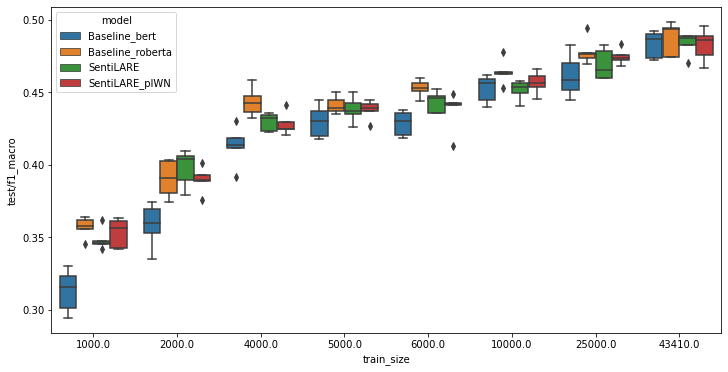

In [6]:
df_goemo_results = df_results[df_results['data_name'] == 'goemotions']
df_goemo_results['train_size'] = df_goemo_results['train_size'].apply(lambda x: 43410 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_goemo_results,
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
)

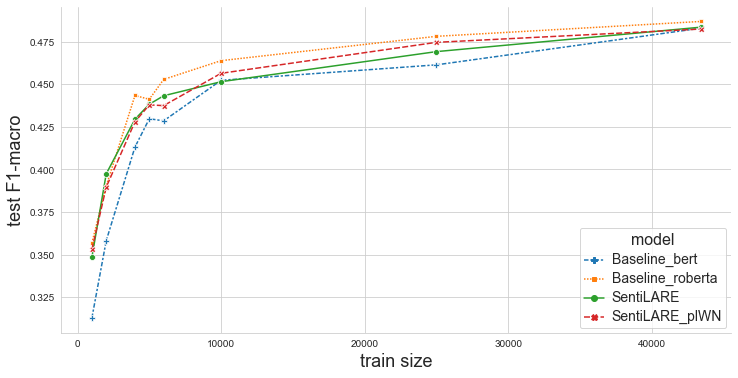

In [7]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_goemo_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [8]:
df_goemo_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std'],
    'test/accuracy': ['mean', 'std'],
}).reset_index()

train_size             model test/f1_macro           test/f1_micro  \
                                         mean       std          mean   
0      1000.0     Baseline_bert      0.312790  0.015040      0.491361   
1      1000.0  Baseline_roberta      0.356787  0.007165      0.512155   
2      1000.0         SentiLARE      0.348381  0.007932      0.512685   
3      1000.0    SentiLARE_plWN      0.353029  0.010384      0.511598   
4      2000.0     Baseline_bert      0.358199  0.015516      0.518537   
5      2000.0  Baseline_roberta      0.390291  0.012849      0.527785   
6      2000.0         SentiLARE      0.397474  0.012942      0.523127   
7      2000.0    SentiLARE_plWN      0.389646  0.009092      0.533705   
8      4000.0     Baseline_bert      0.413136  0.014020      0.535183   
9      4000.0  Baseline_roberta      0.443444  0.010270      0.548017   
10     4000.0         SentiLARE      0.429500  0.006414      0.545000   
11     4000.0    SentiLARE_plWN      0.428008  0.007832      0.538690   
12     5000.0     Baseline_bert      0.429785  0.011274      0.539397   
13     5000.0  Baseline_roberta      0.441194  0.006179      0.532418   
14     5000.0         SentiLARE      0.438302  0.008948      0.549707   
15     5000.0    SentiLARE_plWN      0.437916  0.006750      0.543377   
16     6000.0     Baseline_bert      0.428556  0.008810      0.541412   
17     6000.0  Baseline_roberta      0.452880  0.006037      0.553025   
18     6000.0         SentiLARE      0.443287  0.007318      0.549956   
19     6000.0    SentiLARE_plWN      0.437496  0.014115      0.545370   
20    10000.0     Baseline_bert      0.452367  0.009480      0.547986   
21    10000.0  Baseline_roberta      0.463903  0.008728      0.564281   
22    10000.0         SentiLARE      0.451543  0.006987      0.556486   
23    10000.0    SentiLARE_plWN      0.456469  0.007823      0.561283   
24    25000.0     Baseline_bert      0.461438  0.014902      0.561335   
25    25000.0  Baseline_roberta      0.478188  0.009374      0.572378   
26    25000.0         SentiLARE      0.469203  0.010695      0.573763   
27    25000.0    SentiLARE_plWN      0.474657  0.005594      0.566839   
28    43410.0     Baseline_bert      0.482942  0.009421      0.573222   
29    43410.0  Baseline_roberta      0.486916  0.011954      0.569488   
30    43410.0         SentiLARE      0.483551  0.007904      0.576143   
31    43410.0    SentiLARE_plWN      0.482456  0.011439      0.565459   

             test/accuracy            
         std          mean       std  
0   0.013148      0.962279  0.000754  
1   0.009227      0.961700  0.000762  
2   0.008070      0.960942  0.001493  
3   0.010231      0.961000  0.000933  
4   0.009941      0.962242  0.001370  
5   0.019057      0.962126  0.001392  
6   0.009044      0.960513  0.001074  
7   0.014163      0.961331  0.001274  
8   0.006643      0.962114  0.001013  
9   0.007577      0.962215  0.000435  
10  0.014583      0.961928  0.001623  
11  0.012734      0.960980  0.001500  
12  0.017872      0.962429  0.001626  
13  0.017632      0.960984  0.001237  
14  0.011799      0.962181  0.000705  
15  0.006575      0.961494  0.000601  
16  0.007881      0.962850  0.000629  
17  0.002755      0.962990  0.000455  
18  0.010504      0.962204  0.001145  
19  0.011398      0.961740  0.001168  
20  0.019422      0.962794  0.001503  
21  0.009095      0.963285  0.000866  
22  0.009508      0.962432  0.000777  
23  0.007534      0.962840  0.000712  
24  0.008371      0.963835  0.000773  
25  0.003180      0.964526  0.000377  
26  0.005053      0.963779  0.000819  
27  0.003838      0.963619  0.000308  
28  0.002980      0.964822  0.000651  
29  0.009604      0.964406  0.000912  
30  0.009335      0.964984  0.002044  
31  0.008359      0.963226  0.000492

### GoEmotions sentiment

/tmp/ipykernel_9128/3695952987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goemo_sentiment_results['train_size'] = df_goemo_sentiment_results['train_size'].apply(lambda x: 43410 if x == 0 else x)


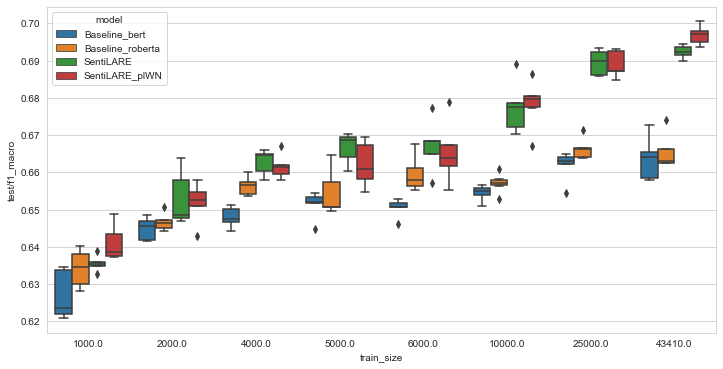

In [9]:
df_goemo_sentiment_results = df_results[df_results['data_name'] == 'goemotions_sent']
df_goemo_sentiment_results['train_size'] = df_goemo_sentiment_results['train_size'].apply(lambda x: 43410 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_goemo_sentiment_results,
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
)

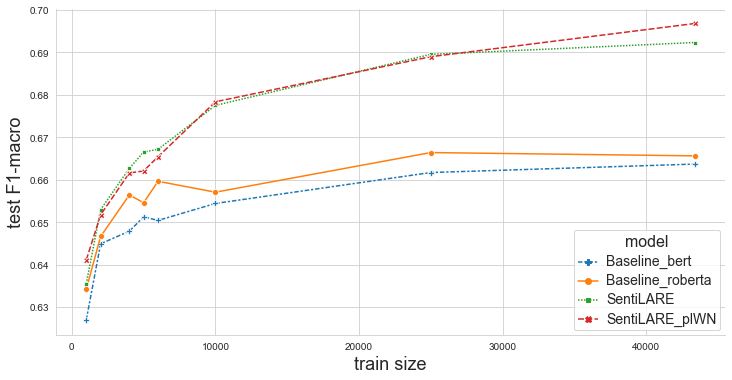

In [10]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_goemo_sentiment_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [11]:
df_goemo_sentiment_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std'],
    'test/accuracy': ['mean', 'std'],
}).reset_index()

train_size             model test/f1_macro           test/f1_micro  \
                                         mean       std          mean   
0      1000.0     Baseline_bert      0.626990  0.006667      0.660046   
1      1000.0  Baseline_roberta      0.634214  0.005172      0.669133   
2      1000.0         SentiLARE      0.635536  0.002256      0.667796   
3      1000.0    SentiLARE_plWN      0.641107  0.004925      0.670998   
4      2000.0     Baseline_bert      0.644932  0.003042      0.676545   
5      2000.0  Baseline_roberta      0.646651  0.002439      0.679454   
6      2000.0         SentiLARE      0.652967  0.007481      0.683389   
7      2000.0    SentiLARE_plWN      0.651757  0.005659      0.680756   
8      4000.0     Baseline_bert      0.647899  0.002778      0.680103   
9      4000.0  Baseline_roberta      0.656421  0.002598      0.688342   
10     4000.0         SentiLARE      0.662697  0.003446      0.693007   
11     4000.0    SentiLARE_plWN      0.661601  0.003471      0.692687   
12     5000.0     Baseline_bert      0.651282  0.003737      0.682227   
13     5000.0  Baseline_roberta      0.654602  0.006466      0.685494   
14     5000.0         SentiLARE      0.666545  0.004173      0.697286   
15     5000.0    SentiLARE_plWN      0.662099  0.006212      0.692197   
16     6000.0     Baseline_bert      0.650433  0.002557      0.680982   
17     6000.0  Baseline_roberta      0.659648  0.004997      0.692261   
18     6000.0         SentiLARE      0.667177  0.007259      0.695975   
19     6000.0    SentiLARE_plWN      0.665428  0.008719      0.695776   
20    10000.0     Baseline_bert      0.654431  0.002135      0.686983   
21    10000.0  Baseline_roberta      0.657083  0.002585      0.689437   
22    10000.0         SentiLARE      0.677519  0.007408      0.703998   
23    10000.0    SentiLARE_plWN      0.678373  0.006374      0.704729   
24    25000.0     Baseline_bert      0.661712  0.004173      0.692550   
25    25000.0  Baseline_roberta      0.666413  0.003015      0.694539   
26    25000.0         SentiLARE      0.689542  0.003456      0.716595   
27    25000.0    SentiLARE_plWN      0.688991  0.003692      0.715980   
28    43410.0     Baseline_bert      0.663706  0.006001      0.695215   
29    43410.0  Baseline_roberta      0.665639  0.005673      0.696321   
30    43410.0         SentiLARE      0.692334  0.001793      0.720398   
31    43410.0    SentiLARE_plWN      0.696817  0.002591      0.723477   

             test/accuracy            
         std          mean       std  
0   0.003636      0.818334  0.002110  
1   0.007913      0.821891  0.003834  
2   0.002028      0.818482  0.001930  
3   0.004771      0.818519  0.003821  
4   0.001590      0.825889  0.001208  
5   0.004306      0.826903  0.002601  
6   0.005612      0.824249  0.003052  
7   0.005411      0.823752  0.002368  
8   0.002643      0.827501  0.004751  
9   0.003317      0.832550  0.001881  
10  0.002689      0.835342  0.007065  
11  0.004932      0.837323  0.005582  
12  0.003268      0.829040  0.001745  
13  0.004267      0.831868  0.002239  
14  0.003263      0.841211  0.006530  
15  0.006785      0.838953  0.006593  
16  0.003141      0.827437  0.001148  
17  0.005107      0.834199  0.003091  
18  0.005836      0.838170  0.006648  
19  0.006925      0.838004  0.006900  
20  0.004187      0.831039  0.002696  
21  0.004240      0.834761  0.002531  
22  0.005355      0.843680  0.005479  
23  0.005264      0.845272  0.005971  
24  0.003771      0.837986  0.005996  
25  0.002871      0.840584  0.007563  
26  0.004978      0.852488  0.001288  
27  0.005097      0.851962  0.001999  
28  0.004288      0.837470  0.002602  
29  0.005076      0.840980  0.007023  
30  0.002938      0.853851  0.002133  
31  0.003188      0.855003  0.001888

## IMDB

/tmp/ipykernel_9128/3132795081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb_results['train_size'] = df_imdb_results['train_size'].apply(lambda x: 22500 if x == 0 else x)


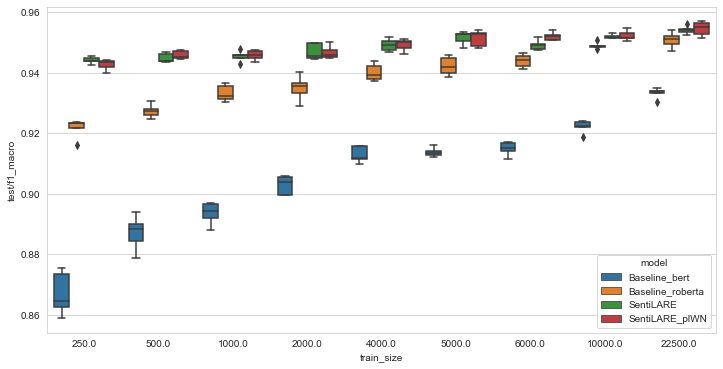

In [13]:
df_imdb_results = df_results[df_results['data_name'] == 'imdb']
df_imdb_results['train_size'] = df_imdb_results['train_size'].apply(lambda x: 22500 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_imdb_results,
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
)

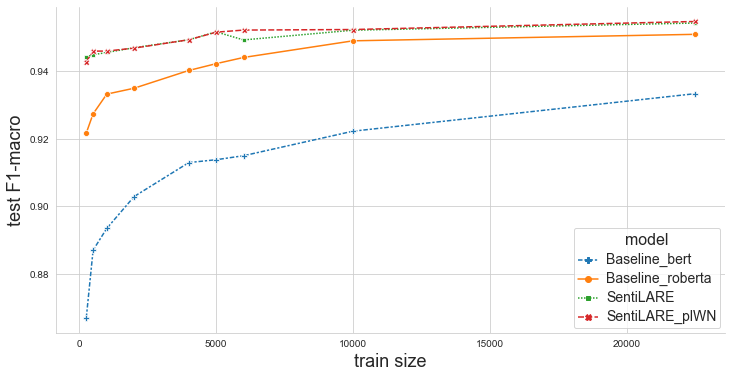

In [14]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_imdb_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [15]:
df_imdb_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std'],
    'test/accuracy': ['mean', 'std'],
}).reset_index()

train_size             model test/f1_macro           test/f1_micro  \
                                         mean       std          mean   
0       250.0     Baseline_bert      0.866992  0.007137      0.867040   
1       250.0  Baseline_roberta      0.921666  0.003280      0.921688   
2       250.0         SentiLARE      0.944215  0.001113      0.944216   
3       250.0    SentiLARE_plWN      0.942746  0.001896      0.942752   
4       500.0     Baseline_bert      0.887047  0.005800      0.887080   
5       500.0  Baseline_roberta      0.927361  0.002237      0.927368   
6       500.0         SentiLARE      0.944852  0.001610      0.944856   
7       500.0    SentiLARE_plWN      0.945905  0.001415      0.945912   
8      1000.0     Baseline_bert      0.893483  0.003688      0.893512   
9      1000.0  Baseline_roberta      0.933193  0.002734      0.933200   
10     1000.0         SentiLARE      0.945501  0.001762      0.945504   
11     1000.0    SentiLARE_plWN      0.945923  0.001605      0.945927   
12     2000.0     Baseline_bert      0.902909  0.003058      0.902912   
13     2000.0  Baseline_roberta      0.934937  0.004220      0.934944   
14     2000.0         SentiLARE      0.946918  0.002724      0.946920   
15     2000.0    SentiLARE_plWN      0.946800  0.002173      0.946800   
16     4000.0     Baseline_bert      0.912950  0.002747      0.912960   
17     4000.0  Baseline_roberta      0.940190  0.002874      0.940192   
18     4000.0         SentiLARE      0.949262  0.002060      0.949264   
19     4000.0    SentiLARE_plWN      0.949276  0.002076      0.949280   
20     5000.0     Baseline_bert      0.913791  0.001557      0.913792   
21     5000.0  Baseline_roberta      0.942204  0.003106      0.942208   
22     5000.0         SentiLARE      0.951594  0.002228      0.951600   
23     5000.0    SentiLARE_plWN      0.951510  0.002698      0.951512   
24     6000.0     Baseline_bert      0.914979  0.002233      0.914984   
25     6000.0  Baseline_roberta      0.944030  0.002231      0.944032   
26     6000.0         SentiLARE      0.949219  0.001657      0.949224   
27     6000.0    SentiLARE_plWN      0.952134  0.001331      0.952136   
28    10000.0     Baseline_bert      0.922231  0.002048      0.922240   
29    10000.0  Baseline_roberta      0.948955  0.001078      0.948960   
30    10000.0         SentiLARE      0.952095  0.000627      0.952096   
31    10000.0    SentiLARE_plWN      0.952294  0.001688      0.952296   
32    22500.0     Baseline_bert      0.933317  0.001689      0.933320   
33    22500.0  Baseline_roberta      0.950874  0.002681      0.950880   
34    22500.0         SentiLARE      0.954214  0.001367      0.954216   
35    22500.0    SentiLARE_plWN      0.954677  0.002333      0.954680   

             test/accuracy            
         std          mean       std  
0   0.007098      0.867040  0.007098  
1   0.003288      0.921688  0.003288  
2   0.001113      0.944216  0.001113  
3   0.001891      0.942752  0.001891  
4   0.005825      0.887080  0.005825  
5   0.002237      0.927368  0.002237  
6   0.001612      0.944856  0.001612  
7   0.001413      0.945912  0.001413  
8   0.003658      0.893512  0.003658  
9   0.002733      0.933200  0.002733  
10  0.001765      0.945504  0.001765  
11  0.001603      0.945927  0.001603  
12  0.003058      0.902912  0.003058  
13  0.004218      0.934944  0.004218  
14  0.002724      0.946920  0.002724  
15  0.002173      0.946800  0.002173  
16  0.002745      0.912960  0.002745  
17  0.002872      0.940192  0.002872  
18  0.002059      0.949264  0.002059  
19  0.002076      0.949280  0.002076  
20  0.001557      0.913792  0.001557  
21  0.003102      0.942208  0.003102  
22  0.002225      0.951600  0.002225  
23  0.002699      0.951512  0.002699  
24  0.002232      0.914984  0.002232  
25  0.002230      0.944032  0.002230  
26  0.001656      0.949224  0.001656  
27  0.001331      0.952136  0.001331  
28  0.002032      0.922240  0.002032  
29  0.001074      0

## Movie Reviews

/tmp/ipykernel_9128/2997691547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_results['train_size'] = df_movie_results['train_size'].apply(lambda x: 8534 if x == 0 else x)


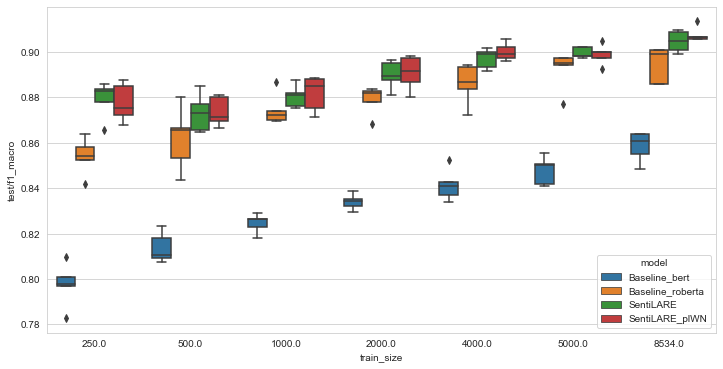

In [17]:
df_movie_results = df_results[df_results['data_name'] == 'movie_reviews']
df_movie_results['train_size'] = df_movie_results['train_size'].apply(lambda x: 8534 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_movie_results,
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
)

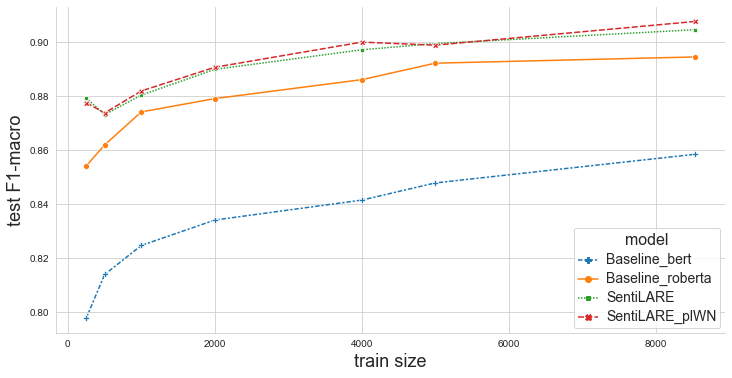

In [18]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_movie_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [19]:
df_movie_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std'],
    'test/accuracy': ['mean', 'std'],
}).reset_index()

train_size             model test/f1_macro           test/f1_micro  \
                                         mean       std          mean   
0       250.0     Baseline_bert      0.797654  0.009630      0.797714   
1       250.0  Baseline_roberta      0.854052  0.008094      0.854095   
2       250.0         SentiLARE      0.879167  0.008141      0.879238   
3       250.0    SentiLARE_plWN      0.877488  0.008413      0.877524   
4       500.0     Baseline_bert      0.813780  0.006699      0.813905   
5       500.0  Baseline_roberta      0.861825  0.013849      0.861905   
6       500.0         SentiLARE      0.873063  0.008323      0.873143   
7       500.0    SentiLARE_plWN      0.873673  0.006402      0.873714   
8      1000.0     Baseline_bert      0.824553  0.004283      0.824762   
9      1000.0  Baseline_roberta      0.874071  0.006452      0.874127   
10     1000.0         SentiLARE      0.880312  0.004908      0.880381   
11     1000.0    SentiLARE_plWN      0.881847  0.007915      0.881905   
12     2000.0     Baseline_bert      0.833973  0.003487      0.834286   
13     2000.0  Baseline_roberta      0.879009  0.006315      0.879048   
14     2000.0         SentiLARE      0.889846  0.006210      0.889905   
15     2000.0    SentiLARE_plWN      0.890626  0.007535      0.890667   
16     4000.0     Baseline_bert      0.841370  0.006937      0.841524   
17     4000.0  Baseline_roberta      0.886031  0.008863      0.886095   
18     4000.0         SentiLARE      0.897102  0.004484      0.897143   
19     4000.0    SentiLARE_plWN      0.899957  0.003881      0.900000   
20     5000.0     Baseline_bert      0.847739  0.006160      0.847810   
21     5000.0  Baseline_roberta      0.892139  0.008482      0.892190   
22     5000.0         SentiLARE      0.899418  0.002298      0.899429   
23     5000.0    SentiLARE_plWN      0.898821  0.004556      0.898857   
24     8534.0     Baseline_bert      0.858356  0.006582      0.858476   
25     8534.0  Baseline_roberta      0.894457  0.008035      0.894476   
26     8534.0         SentiLARE      0.904547  0.004602      0.904571   
27     8534.0    SentiLARE_plWN      0.907610  0.003232      0.907619   

             test/accuracy            
         std          mean       std  
0   0.009633      0.797714  0.009633  
1   0.008092      0.854095  0.008092  
2   0.008064      0.879238  0.008064  
3   0.008427      0.877524  0.008427  
4   0.006821      0.813905  0.006821  
5   0.013834      0.861905  0.013834  
6   0.008314      0.873143  0.008314  
7   0.006410      0.873714  0.006410  
8   0.004416      0.824762  0.004416  
9   0.006443      0.874127  0.006443  
10  0.004976      0.880381  0.004976  
11  0.007900      0.881905  0.007900  
12  0.003230      0.834286  0.003230  
13  0.006245      0.879048  0.006245  
14  0.006194      0.889905  0.006194  
15  0.007541      0.890667  0.007541  
16  0.006920      0.841524  0.006920  
17  0.008847      0.886095  0.008847  
18  0.004518      0.897143  0.004518  
19  0.003869      0.900000  0.003869  
20  0.006150      0.847810  0.006150  
21  0.008502      0.892190  0.008502  
22  0.002294      0.899429  0.002294  
23  0.004538      0.898857  0.004538  
24  0.006550      0.858476  0.006550  
25  0.008036      0.894476  0.008036  
26  0.004587      0.904571  0.004587  
27  0.003230      0.907619  0.003230

## Stanford treebank

/tmp/ipykernel_9128/991027085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treebank_results['train_size'] = df_treebank_results['train_size'].apply(lambda x: 8544 if x == 0 else x)


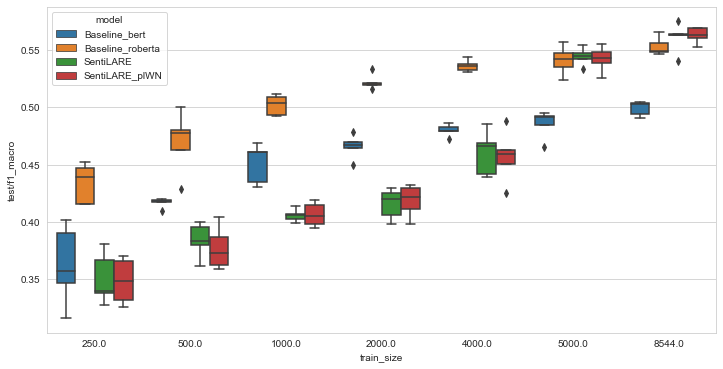

In [20]:
df_treebank_results = df_results[df_results['data_name'] == 'stanford_treebank']
df_treebank_results['train_size'] = df_treebank_results['train_size'].apply(lambda x: 8544 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_treebank_results,
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
)

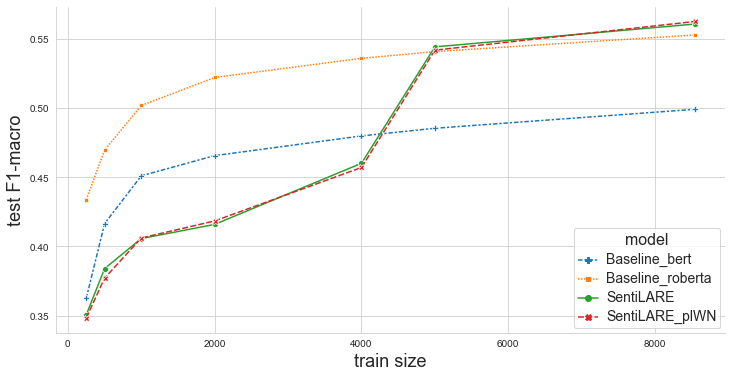

In [21]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_treebank_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [22]:
df_treebank_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std'],
    'test/accuracy': ['mean', 'std'],
}).reset_index()

train_size             model test/f1_macro           test/f1_micro  \
                                         mean       std          mean   
0       250.0     Baseline_bert      0.362437  0.034558      0.396471   
1       250.0  Baseline_roberta      0.433991  0.017525      0.452851   
2       250.0         SentiLARE      0.350453  0.022037      0.408597   
3       250.0    SentiLARE_plWN      0.348224  0.019931      0.409412   
4       500.0     Baseline_bert      0.416617  0.004219      0.434570   
5       500.0  Baseline_roberta      0.469798  0.026770      0.492670   
6       500.0         SentiLARE      0.384002  0.015115      0.430769   
7       500.0    SentiLARE_plWN      0.377099  0.018676      0.422081   
8      1000.0     Baseline_bert      0.451175  0.017316      0.466697   
9      1000.0  Baseline_roberta      0.502106  0.008772      0.512217   
10     1000.0         SentiLARE      0.405741  0.005557      0.466063   
11     1000.0    SentiLARE_plWN      0.406166  0.010608      0.476018   
12     2000.0     Baseline_bert      0.465813  0.010371      0.477285   
13     2000.0  Baseline_roberta      0.522397  0.006684      0.527421   
14     2000.0         SentiLARE      0.415994  0.013166      0.480181   
15     2000.0    SentiLARE_plWN      0.418519  0.013914      0.460000   
16     4000.0     Baseline_bert      0.480069  0.005227      0.489140   
17     4000.0  Baseline_roberta      0.536279  0.004972      0.545882   
18     4000.0         SentiLARE      0.460256  0.019726      0.498552   
19     4000.0    SentiLARE_plWN      0.457214  0.022719      0.481810   
20     5000.0     Baseline_bert      0.485615  0.012088      0.501810   
21     5000.0  Baseline_roberta      0.541160  0.012514      0.552308   
22     5000.0         SentiLARE      0.544559  0.007703      0.555928   
23     5000.0    SentiLARE_plWN      0.542173  0.011090      0.551493   
24     8544.0     Baseline_bert      0.499352  0.006433      0.506878   
25     8544.0  Baseline_roberta      0.553190  0.007791      0.569321   
26     8544.0         SentiLARE      0.561100  0.012781      0.572398   
27     8544.0    SentiLARE_plWN      0.562965  0.007099      0.576652   

             test/accuracy            
         std          mean       std  
0   0.021323      0.396471  0.021323  
1   0.025615      0.452851  0.025615  
2   0.023128      0.408597  0.023128  
3   0.021557      0.409412  0.021557  
4   0.009182      0.434570  0.009182  
5   0.027538      0.492670  0.027538  
6   0.021337      0.430769  0.021337  
7   0.021133      0.422081  0.021133  
8   0.015219      0.466697  0.015219  
9   0.010597      0.512217  0.010597  
10  0.014697      0.466063  0.014697  
11  0.014980      0.476018  0.014980  
12  0.012820      0.477285  0.012820  
13  0.009692      0.527421  0.009692  
14  0.018938      0.480181  0.018938  
15  0.022247      0.460000  0.022247  
16  0.004022      0.489140  0.004022  
17  0.005454      0.545882  0.005454  
18  0.014282      0.498552  0.014282  
19  0.014453      0.481810  0.014453  
20  0.004810      0.501810  0.004810  
21  0.010735      0.552308  0.010735  
22  0.004167      0.555928  0.004167  
23  0.008641      0.551493  0.008641  
24  0.009638      0.506878  0.009638  
25  0.014264      0.569321  0.014264  
26  0.011523      0.572398  0.011523  
27  0.003991      0.576652  0.003991

## Multiemo

/tmp/ipykernel_9128/3115434162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiemo_results['train_size'] = df_multiemo_results['train_size'].apply(lambda x: 6573 if x == 0 else x)


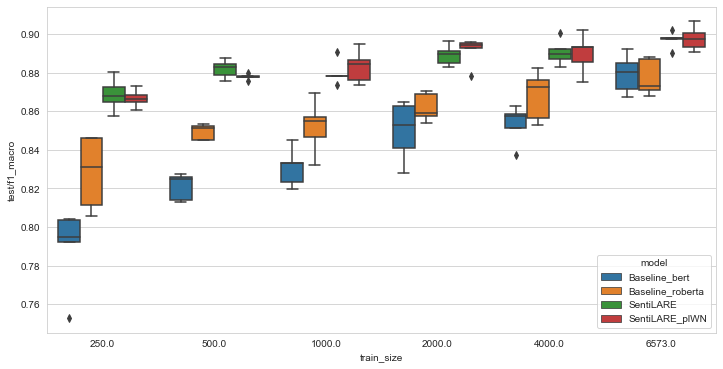

In [23]:
df_multiemo_results = df_results[df_results['data_name'] == 'multiemo']
df_multiemo_results['train_size'] = df_multiemo_results['train_size'].apply(lambda x: 6573 if x == 0 else x)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="train_size",
    y="test/f1_macro",
    hue="model",
    data=df_multiemo_results,
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
)

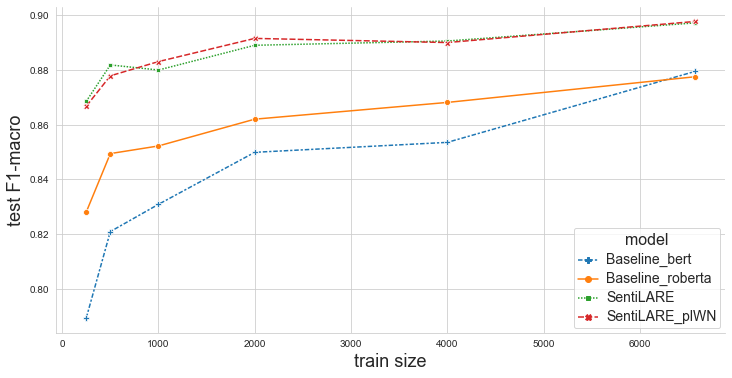

In [24]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.lineplot(
    data=df_multiemo_results,
    x="train_size",
    y="test/f1_macro",
    hue="model",
    style="model",
    hue_order=[
        'Baseline_bert',
        'Baseline_roberta',
        'SentiLARE',
        'SentiLARE_plWN',
    ],
    markers=True,
    dashes=True,
    ci=None,
)
ax.set_xlabel("train size", fontsize=18)
ax.set_ylabel("test F1-macro", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='14')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16')  # for legend title

sns.despine()

In [25]:
df_multiemo_results.groupby(by=['train_size', 'model']).agg({
    'test/f1_macro': ['mean', 'std'],
    'test/f1_micro': ['mean', 'std'],
    'test/accuracy': ['mean', 'std'],
}).reset_index()

train_size             model test/f1_macro           test/f1_micro  \
                                         mean       std          mean   
0       250.0     Baseline_bert      0.789528  0.021114      0.807073   
1       250.0  Baseline_roberta      0.828123  0.019016      0.844146   
2       250.0         SentiLARE      0.868452  0.008567      0.889268   
3       250.0    SentiLARE_plWN      0.866671  0.004563      0.888293   
4       500.0     Baseline_bert      0.821001  0.007005      0.837073   
5       500.0  Baseline_roberta      0.849414  0.004176      0.862195   
6       500.0         SentiLARE      0.881710  0.004631      0.897073   
7       500.0    SentiLARE_plWN      0.877741  0.001419      0.893658   
8      1000.0     Baseline_bert      0.830926  0.009924      0.846585   
9      1000.0  Baseline_roberta      0.852194  0.012689      0.866057   
10     1000.0         SentiLARE      0.879854  0.006489      0.896098   
11     1000.0    SentiLARE_plWN      0.882933  0.008225      0.898984   
12     2000.0     Baseline_bert      0.849874  0.015340      0.860732   
13     2000.0  Baseline_roberta      0.861948  0.007392      0.875122   
14     2000.0         SentiLARE      0.888865  0.005243      0.900732   
15     2000.0    SentiLARE_plWN      0.891374  0.007338      0.902683   
16     4000.0     Baseline_bert      0.853495  0.009941      0.868537   
17     4000.0  Baseline_roberta      0.868047  0.012725      0.883171   
18     4000.0         SentiLARE      0.890421  0.006589      0.903415   
19     4000.0    SentiLARE_plWN      0.889862  0.010112      0.902927   
20     6573.0     Baseline_bert      0.879343  0.009988      0.889756   
21     6573.0  Baseline_roberta      0.877400  0.009501      0.890488   
22     6573.0         SentiLARE      0.897019  0.004225      0.908781   
23     6573.0    SentiLARE_plWN      0.897543  0.006282      0.911220   

             test/accuracy            
         std          mean       std  
0   0.014971      0.807073  0.014971  
1   0.015722      0.844146  0.015722  
2   0.008978      0.889268  0.008978  
3   0.005357      0.888293  0.005358  
4   0.003061      0.837073  0.003061  
5   0.004644      0.862195  0.004644  
6   0.005887      0.897073  0.005887  
7   0.002004      0.893659  0.002004  
8   0.012802      0.846585  0.012802  
9   0.010809      0.866057  0.010809  
10  0.006182      0.896098  0.006182  
11  0.007534      0.898984  0.007534  
12  0.011742      0.860732  0.011742  
13  0.005823      0.875122  0.005823  
14  0.005759      0.900732  0.005759  
15  0.006302      0.902683  0.006301  
16  0.007438      0.868537  0.007438  
17  0.011157      0.883171  0.011157  
18  0.005874      0.903415  0.005874  
19  0.011197      0.902927  0.011197  
20  0.007837      0.889756  0.007837  
21  0.010218      0.890488  0.010218  
22  0.005874      0.908781  0.005874  
23  0.004514      0.911220  0.004514

### Plot all FacetGrid

In [33]:
df_all_results = pd.concat([
    df_imdb_results,
    df_movie_results,
    df_treebank_results,
    df_multiemo_results,
    df_goemo_sentiment_results,
    df_goemo_results,
])
MODEL_NAME_MAP = {
    'SentiLARE': 'SentiLARE (SentiWN)',
    'SentiLARE_plWN': 'SentiLARE (plWN)',
    'Baseline_bert': 'Baseline BERT',
    'Baseline_roberta': 'Baseline RoBERTa',
}
DATASET_NAME_MAP = {
    'multiemo': 'Multiemo',
    'klej_ar': 'Allegro Reviews',
    'goemotions': 'GoEmotions',
    'stanford_treebank': 'Stanford Treebank',
    'movie_reviews': 'Movie Reviews',
    'imdb': 'IMDB',
    'goemotions_sent': 'GoEmotions Sentiment'
}
df_all_results['model'] = df_all_results['model'].apply(lambda x: MODEL_NAME_MAP[x])
df_all_results['data_name'] = df_all_results['data_name'].apply(lambda x: DATASET_NAME_MAP[x])
df_all_results = df_all_results.rename(
    columns={
        'test/f1_micro': 'F1-micro',
        'test/f1_macro': 'F1-macro',
        'test/accuracy': 'accuracy',
        'train_size': 'train size',
        'data_name': 'dataset',
    }
)
df_all_results.head()

,dataset,model,repeat,epoch,train size,F1-micro,F1-macro,accuracy
171,IMDB,Baseline RoBERTa,0.0,3.0,1000.0,0.93240,0.932393,0.93240
177,IMDB,SentiLARE (plWN),0.0,4.0,1000.0,0.94696,0.946960,0.94696
202,IMDB,SentiLARE (SentiWN),4.0,18.0,22500.0,0.95460,0.954600,0.95460
208,IMDB,SentiLARE (SentiWN),3.0,17.0,22500.0,0.95408,0.954080,0.95408
212,IMDB,Baseline RoBERTa,4.0,1.0,22500.0,0.95428,0.954275,0.95428


<Figure size 864x432 with 0 Axes>

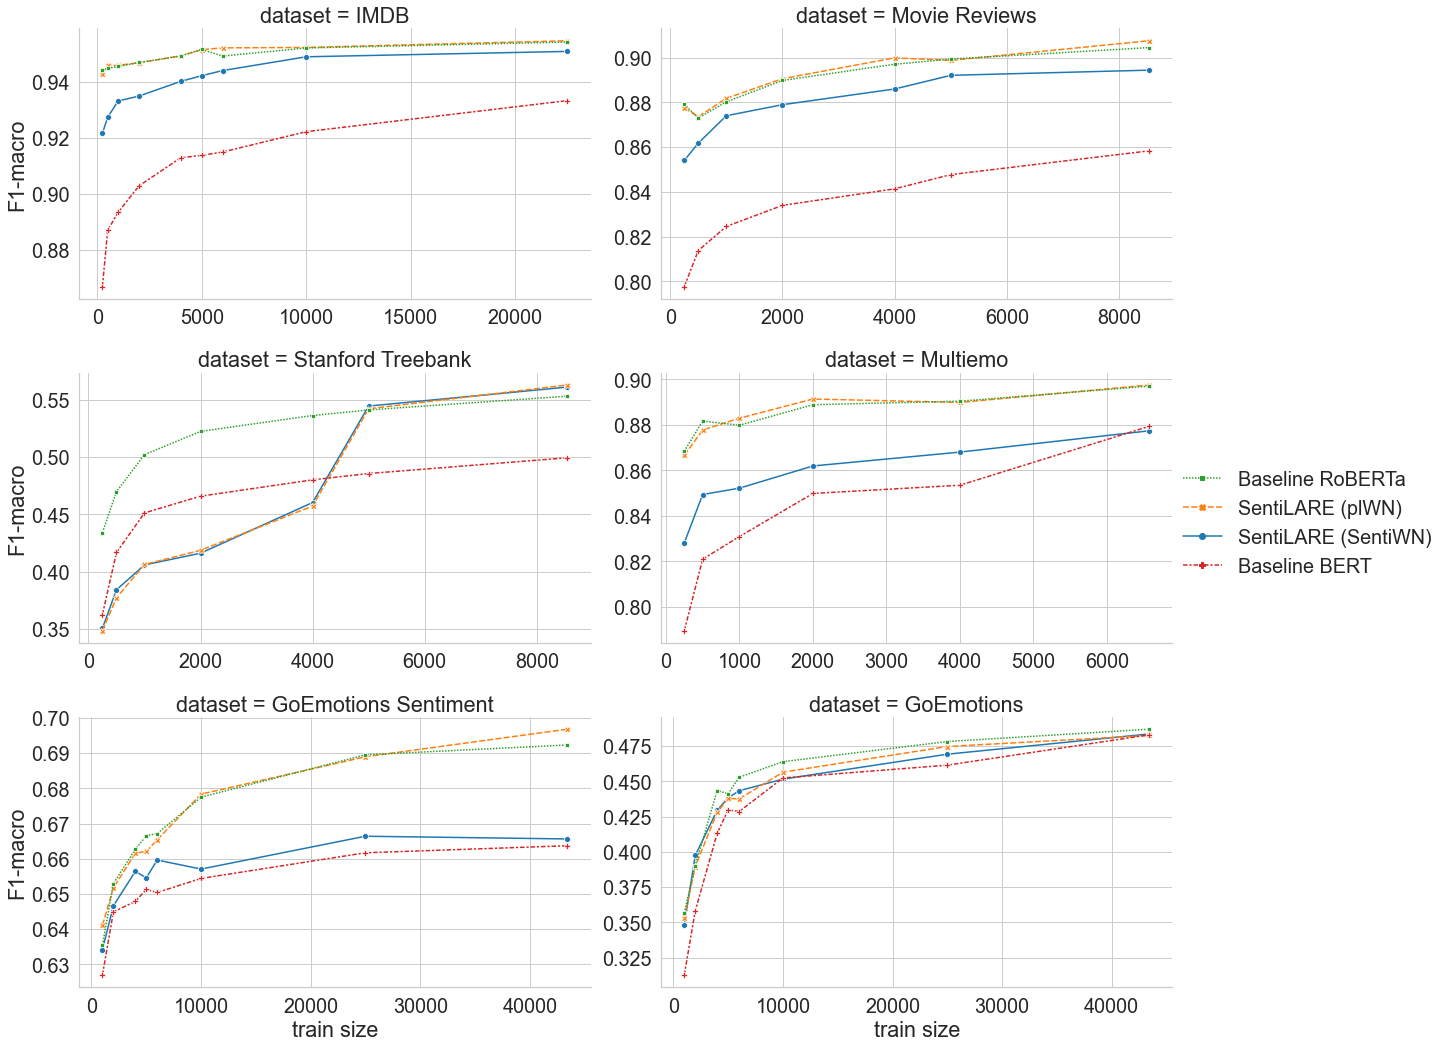

In [36]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

with sns.plotting_context("notebook", font_scale=1.8):
    g = sns.FacetGrid(
        df_all_results,
        col="dataset",
        col_wrap=2,
        sharey=False,
        sharex=False,
        height=5,
        aspect=1.7,
        legend_out=True,
        hue_order=[
            'Baseline BERT',
            'Baseline RoBERTa',
            'SentiLARE (SentiWN)',
            'SentiLARE (plWN)',
        ],
    )
    g.map_dataframe(
        sns.lineplot,
        x="train size",
        y="F1-macro",
        style="model",
        markers=True,
        dashes=True,
        ci=None,
        hue="model",
    )
    g.add_legend()


sns.despine()
g.savefig(FIGURE_DIR.joinpath('pretrain_exp_results.png'), dpi=300)